In [20]:
import numpy as np 
import pandas as pd 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
from pandas.tools.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

In [21]:
train=pd.read_csv('ForestCoverTrain.csv')
test=pd.read_csv('ForestCoverTest.csv')

In [22]:
print('size of train data' , train.shape)
print('size of test data' , test.shape)

size of train data (15120, 56)
size of test data (565892, 55)


/Users/abhisheksrivastava/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



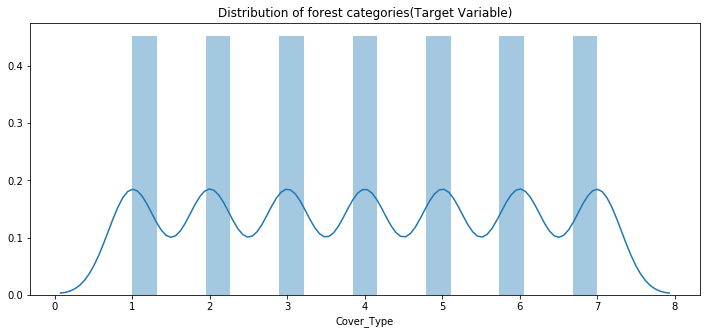

In [6]:
plt.figure(figsize=(12,5))
plt.title("Distribution of forest categories(Target Variable)")
ax=sns.distplot(train["Cover_Type"])

/Users/abhisheksrivastava/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



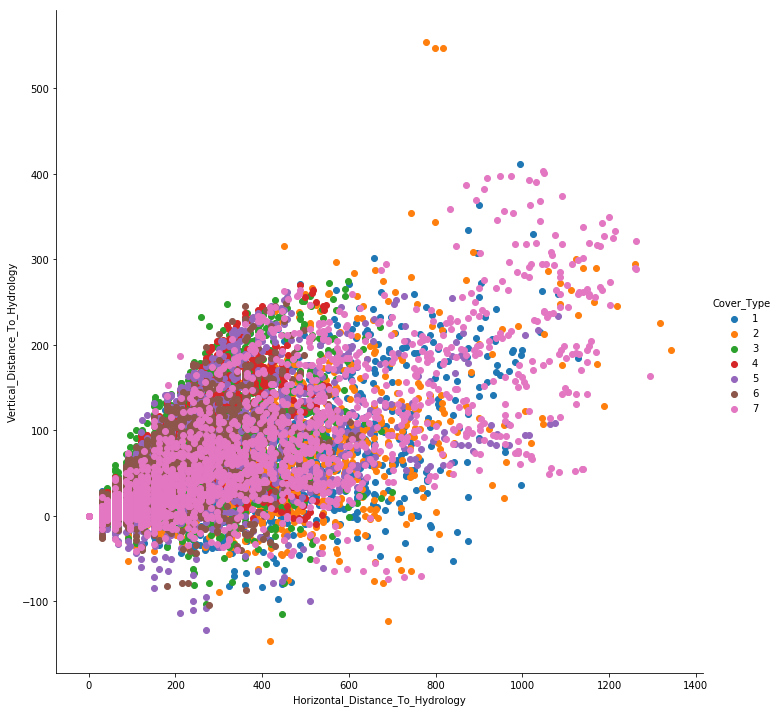

In [7]:
sns.FacetGrid(train,hue="Cover_Type" , size=10).map(plt.scatter,
            "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology").add_legend()



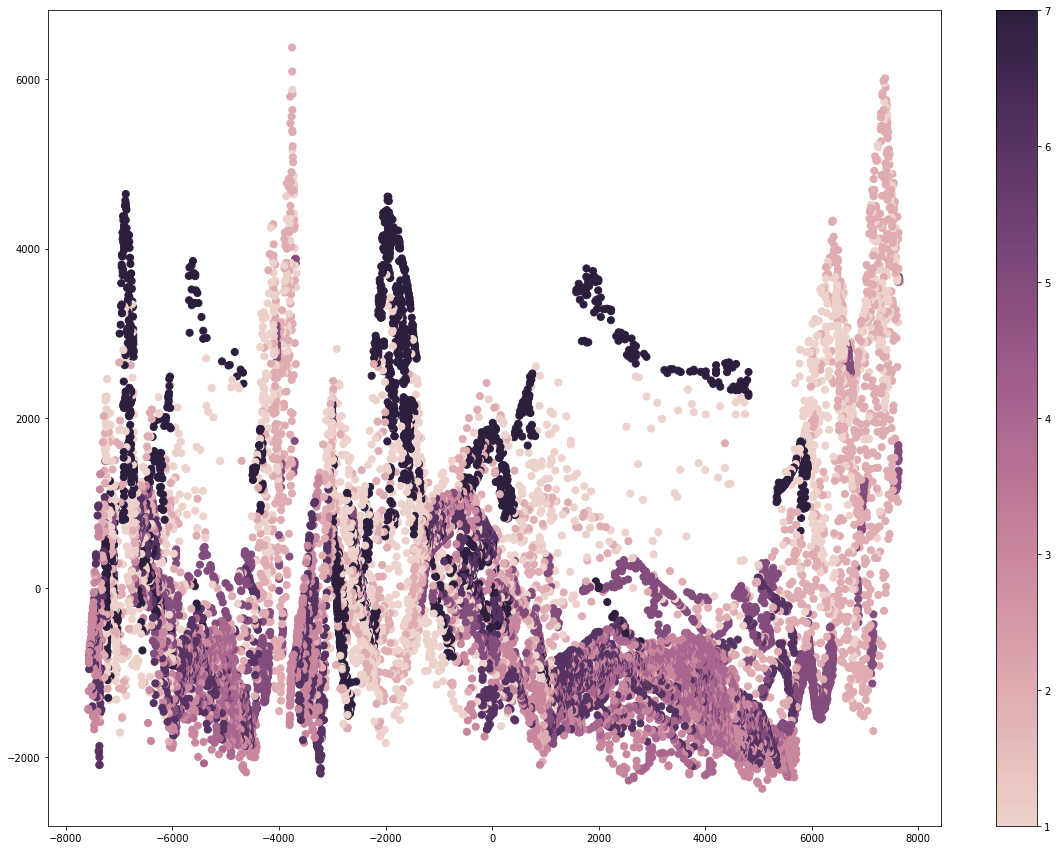

In [13]:
pca=PCA(n_components=3)
pca_results=pca.fit_transform(train.drop(["Cover_Type"],axis=1))
cmap=sns.cubehelix_palette(as_cmap=True)
tp,ax=plt.subplots(figsize=(20,15))
temp=ax.scatter(pca_results[:,0],pca_results[:,1],c=train.Cover_Type,s=50,cmap=cmap)
tp.colorbar(temp)
plt.show()

In [23]:
train['HF1']=train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points']
train['HF2']=abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])
train['HR1'] = abs(train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])
train['HR2'] = abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])
train['FR1'] = abs(train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])
train['FR2'] = abs(train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])
train['ele_vert']=train.Elevation-train.Vertical_Distance_To_Hydrology
train['slope_hyd']=(train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)**0.5

train['Mean_Amenities']=(train.Horizontal_Distance_To_Fire_Points+train.Horizontal_Distance_To_Hydrology+train.Horizontal_Distance_To_Roadways)/3
train['Mean_Fire_Hyd']=(train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology) / 2 


test['HF1'] = test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points']
test['HF2'] = abs(test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])
test['HR1'] = abs(test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])
test['HR2'] = abs(test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])
test['FR1'] = abs(test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])
test['FR2'] = abs(test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])
test['ele_vert'] = test.Elevation-test.Vertical_Distance_To_Hydrology

test['slope_hyd'] = (test['Horizontal_Distance_To_Hydrology']**2+test['Vertical_Distance_To_Hydrology']**2)**0.5
test.slope_hyd=test.slope_hyd.map(lambda x: 0 if np.isinf(x) else x)

 
test['Mean_Amenities']=(test.Horizontal_Distance_To_Fire_Points + test.Horizontal_Distance_To_Hydrology + test.Horizontal_Distance_To_Roadways) / 3  
test['Mean_Fire_Hyd']=(test.Horizontal_Distance_To_Fire_Points + test.Horizontal_Distance_To_Hydrology) / 2




In [24]:
feature = [col for col in train.columns if col not in['Cover_Type' ,'Id']]
X_train=train[feature]
X_test=test[feature]
etc=ensemble.ExtraTreesClassifier(n_estimators=350)
etc.fit(X_train,train['Cover_Type'])



ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [29]:
y_pred=etc.predict(X_test)